# Introdução


O objetivo deste trabalho é analisar uma base de dados de vinho no qual baseado em suas composições químicas o algoritmo tentará acertar sua qualidade. Serão utilizados os algoritmos de aprendizado de máquina supervisionados Árvore de Decisão e Rede Neural, além do algoritmo não supervisionado K-means. Os algoritmos consistem em etapas de treino e teste. Serão utilizados as métricas acurácia, precisão, recall, F1-score para identificar se o algoritmo está sendo eficiente, além de analisar a matriz de confusão para os modelos de aprendizado supervisionado. <br>
A base de dados esta disponivel em: https://archive.ics.uci.edu/dataset/186/wine+quality

# Análise exploratória dos dados


In [2]:
#Instalação do pacote para extrair os dados
!pip install ucimlrepo

In [3]:
#Importação da base de dados e das bibliotecas de manipulação de dados
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# buscar conjunto de dados
wine_quality = fetch_ucirepo(id=186)

In [36]:
#Descrissão da base de dados
wine_quality.metadata

{'uci_id': 186,
 'name': 'Wine Quality',
 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality',
 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv',
 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).',
 'area': 'Business',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 4898,
 'num_features': 11,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['quality'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Wed Nov 15 2023',
 'dataset_doi': '10.24432/C56S3T',
 'creators': ['Paulo Cortez',
  'A. Cerdeira',
  'F. Almeida',
  'T. Matos',
  'J. Reis'],
 'intro_paper': {'ID': 252,
  'type': 'NATIVE',
  'ti

In [35]:
#Visualizando a base de dados
df = pd.DataFrame(wine_quality.data.original)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [37]:
#Analise da matriz de correlação
df.drop('color',axis=1, inplace=True)
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


**Correlação dos dados**<br>
A correlação mostra a relação entre cada par de colunas. <br>
O valor da correlação varia entre -1 e 1: <br>

*    1: Correlação positiva
*   -1: Correlação negativa
*   0: Nenhuma correlação linear <br>


 Foi necessário realizar a retirada da coluna 'color' pelo fato dos dados estarem como string e não como float. <br>
 De acordo com os dados obtidos não temos uma correlação forte entre as colunas das composições quimicas com a qualidade do vinho, a principal correlação indeficada é o alcohol, com 0.444319. Caso houvesse uma composição química muita proxima de 1 com a qualidade isso forneceria a informação de que a coluna tem grandes chances de impactar positivamente na qualidade do vinho.  <br>


# Implementação dos algoritmos


In [5]:
# Variaveis para execução dos modelo
X = wine_quality.data.features
y = wine_quality.data.targets

In [75]:
#Árvore de decisão
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train_decisionTree, X_test_decisionTree, y_train_decisionTree, y_test_decisionTree = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train_decisionTree, y_train_decisionTree)
y_pred_decisionTree = tree_model.predict(X_test_decisionTree)


In [77]:
#Rede Neural
from sklearn.neural_network import MLPClassifier

X_train_neural, X_test_neural, y_train_neural, y_test_neural = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
network_model = MLPClassifier()
network_model.fit(X_train_neural, y_train_neural)
y_pred_neural = network_model.predict(X_test_neural)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**K-Means**

In [82]:
pip install yellowbrick

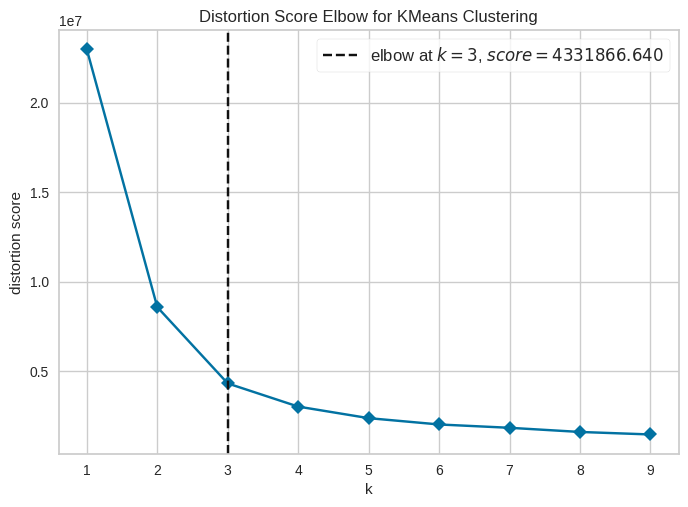

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
#Método Elbow para a escolha do melhor numero de cluster
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(X)
visualizer.show()

In [91]:
pca = PCA()
X = pca.fit_transform(X)

In [95]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

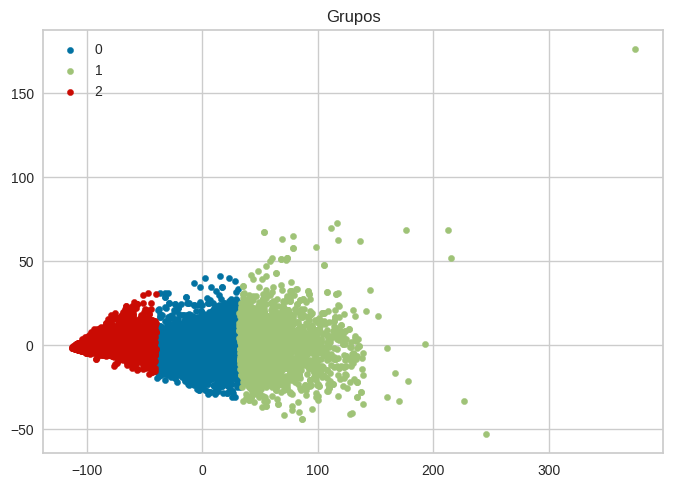

In [97]:
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)

plt.legend()
plt.title('Grupos')
plt.show()

# Métricas de Avaliação


In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold


In [74]:
#Metricas utilizada no modelo Árvore de Decisão
#Acuracia
acc_decisionTree = accuracy_score(y_test_decisionTree, y_pred_decisionTree)*100

#Precisão
pre_decisionTree = precision_score(y_test_decisionTree, y_pred_decisionTree, average='weighted')*100

#Recall
recall_decisionTree = recall_score(y_test_decisionTree, y_pred_decisionTree, average='weighted')*100

#F1-score
f1_decisionTree = f1_score(y_test_decisionTree, y_pred_decisionTree, average='weighted')*100

#Matriz de confusão
confusion_decisionTree = confusion_matrix(y_test_decisionTree, y_pred_decisionTree )*100

print(f"Acurácia: {acc_decisionTree:.2f}%")
print(f"Precisão: {pre_decisionTree:.2f}%")
print(f"Recall: {recall_decisionTree:.2f}%")
print(f"F1-score: {f1_decisionTree:.2f}%")
print("Matriz de confusão:")
print(confusion_decisionTree)

Acurácia: 50.87%
Precisão: 47.26%
Recall: 50.87%
F1-score: 48.16%
Matriz de confusão:
[[    0     0   400   400   100     0     0]
 [    0     0  2900  3200   400     0     0]
 [    0     0 34200 28900  1100     0     0]
 [    0     0 20800 56500  7800     0     0]
 [    0     0  1800 22100  8500     0     0]
 [    0     0     0  3800  2000     0     0]
 [    0     0     0     0   100     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Matriz de confusão** <br>
A matriz de confusão mostra que o modelo tem dificuldade em distinguir claramente várias classes, especialmente as classes 0, 1 e 6, que são frequentemente confundidas com as classes 2, 3 e 4. As classes 2 e 3 têm uma quantidade considerável de previsões corretas, mas ainda há confusões significativas entre elas. A Classe 4 também é frequentemente confundida com a Classe 3, e a Classe 6 é completamente mal classificada como Classe 4.

In [ ]:
#Validação cruzada árvore de decisão
KFold = KFold(n_splits=5, shuffle=True, random_state=42)

modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_val_score(modelo, X, y, cv=KFold)
scores

array([0.51307692, 0.53538462, 0.52578907, 0.52040031, 0.52655889])

**Validação cruzada** <br>
A validação cruzada utilizando K-Fold com 5 divisões resultou em acurácias variando entre 51,3% e 53,5%, indicando uma performance estável do modelo. Não houve grandes discrepâncias entre os resultados dos diferentes folds, sugerindo que o modelo está generalizando de forma consistente sobre os dados.

In [78]:
#Metricas utilizada no modelo Rede Neural
#Acuracia
acc_neural = accuracy_score(y, previsoes)*100

#Precisão
pre_neural = precision_score(y_test_neural, y_pred_neural, average='weighted')*100

#Recall
recall_neural = recall_score(y_test_neural, y_pred_neural, average='weighted')*100

#F1-score
f1_neural = f1_score(y_test_neural, y_pred_neural, average='weighted')*100

#Matriz de confusão aplicada no modelo Rede Neural
confusion_neural = confusion_matrix(y_test_neural, y_pred_neural)

print(f"Acurácia: {acc_neural:.2f}%")
print(f"Precisão: {pre_neural:.2f}%")
print(f"Recall: {recall_neural:.2f}%")
print(f"F1-score: {f1_neural:.2f}%")
print("Matriz de confusão:")
print(confusion_neural)


Acurácia: 54.56%
Precisão: 51.22%
Recall: 51.54%
F1-score: 49.07%
Matriz de confusão:
[[  1   0   3   1   1   0   0]
 [  1   3  22  17   0   0   0]
 [  2   2 159 259   6   0   0]
 [  1   2  73 411  80   0   0]
 [  0   0   3 117  96   0   0]
 [  0   0   0  18  21   0   0]
 [  0   0   0   1   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Matriz de confusão** <br>
A análise desta matriz de confusão mostra que o modelo tem dificuldades significativas em classificar corretamente diversas classes. As classes 3 e 4 apresentam um número maior de classificações corretas, com 411 e 96 instâncias respectivamente, mas ainda existem muitas confusões, especialmente entre as classes 2, 3 e 4. Por exemplo, muitas instâncias da classe 2 foram incorretamente classificadas como classe 3 (259 vezes).



In [79]:
KFold = KFold(n_splits=5, shuffle=True, random_state=42)

modelo = MLPClassifier()
scores = cross_val_score(modelo, X, y, cv=KFold)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed w

array([0.50307692, 0.51769231, 0.5234796 , 0.48806774, 0.54503464])

**Validação cruzada**<br>
A validação cruzada com o modelo MLPClassifier resultou em acurácias entre 48,8% e 54,5%, mostrando uma variação moderada entre os folds.

In [100]:
#Melhoria Árvore de decisão
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_model.fit(X_train_decisionTree, y_train_decisionTree)
y_pred_decisionTree = tree_model.predict(X_test_decisionTree)


In [101]:
#Acuracia
acc_decisionTree = accuracy_score(y_test_decisionTree, y_pred_decisionTree)*100

#Precisão
pre_decisionTree = precision_score(y_test_decisionTree, y_pred_decisionTree, average='weighted')*100

#Recall
recall_decisionTree = recall_score(y_test_decisionTree, y_pred_decisionTree, average='weighted')*100

#F1-score
f1_decisionTree = f1_score(y_test_decisionTree, y_pred_decisionTree, average='weighted')*100

#Matriz de confusão
confusion_decisionTree = confusion_matrix(y_test_decisionTree, y_pred_decisionTree )*100

print(f"Acurácia: {acc_decisionTree:.2f}%")
print(f"Precisão: {pre_decisionTree:.2f}%")
print(f"Recall: {recall_decisionTree:.2f}%")
print(f"F1-score: {f1_decisionTree:.2f}%")
print("Matriz de confusão:")
print(confusion_decisionTree)

Acurácia: 57.79%
Precisão: 58.20%
Recall: 57.79%
F1-score: 57.94%
Matriz de confusão:
[[    0   100   400   300   100     0     0]
 [  100  1500  2400  1800   500   200     0]
 [  100  3400 38400 18400  3500   400     0]
 [    0  2500 16400 52200 12200  1700   100]
 [    0   400  2600  9800 18100  1500     0]
 [    0     0   400  1100  1800  2500     0]
 [    0     0     0   100     0     0     0]]


**Matriz de confusão**
Embora a metrica aponte para uma melhora do algoritmo, a matriz de confusão indica que o modelo está cometendo muitos erros de classificação, com confusões significativas entre várias classes. A maior parte das previsões corretas está concentrada nas classes 2, 3 e 4. Por exemplo, a classe 2 possui 38.400 classificações corretas, mas ainda há muitas confusões, especialmente com as classes 1 e 3, que somam milhares de erros. A classe 3 tem 52.200 classificações corretas, mas também é confundida com outras classes, principalmente a classe 2 (16.400 vezes) e a classe 4 (12.200 vezes).

 **Melhoria** <br>
 O algoritmo obteve um ganho de performace alterando o critério de divisão como entropia, que mede a incerteza ou "impureza" dos dados e tenta minimizar essa incerteza ao longo da árvore. Com isso podemos notar que houve uma melhoria nos resultados das metricas.


# Discussão dos Resultados

Embora os modelos não tenham apresentado resultados satisfatórios, observa-se que a árvore de decisão teve um desempenho superior em lidar com o objetivo da base de dados. Analisando as métricas, nota-se uma equivalência de desempenho entre os dois primeiros algoritmos testados, a árvore de decisão e a rede neural, ambos com uma taxa de acerto em torno de 50%, o que indica que os modelos não estão generalizando bem para os dados.<br>

Já os algoritmos não supervisionados, como o K-means, funcionam de forma diferente, realizando a clusterização dos dados. Apesar das limitações dos modelos supervisionados, o K-means conseguiu separar razoavelmente bem os clusters, especialmente com a aplicação do método do cotovelo (elbow), que ajudou a definir o número ideal de clusters.<br>

# Conclusão

Embora os algoritmos apresentados não tenham alcançado resultados significativos, é possível notar que podem ser aprimorados por meio da alteração de seus parâmetros. Além disso, compreender o funcionamento de cada algoritmo e como utilizar os parâmetros de maneira adequada foi um desafio, mas fundamental para tentar otimizar os resultados e encontrar a melhor performance possível.